In [1]:
from kaveh.behavioral.oculomotor.session import session
from kaveh.toolbox import find_file
from neo.io import Spike2IO
from matplotlib import pyplot as plt



In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
buckley_files_correct_events = ['B082107_1340_List.smr', #yes
'B090407_1526_List.smr', # yes
'B091208_1545_List.smr', # No done
'B091608_1208_List.smr', # No done
'B091707_1414_List.smr', # No done
'B091908_1_1500_List.smr', # No done
'B091908_2_1550_List.smr', # No done
'B093008_1149_List.smr', # No done
'B100308_2_1403_List.smr', # No done
'B101707_1333_List.smr', # yes
'B121407_1_1124_List.smr', # No done >> tuning doesn't match
'W091008_1241_List.smr', # No done
'W091208_1337_List.smr', # No done: bimodal cs-on
'W120108_1622_List.smr', # Yes --> actually no, the labled cs are nonsense; also weird saccades; needs more filtering
'W120208_1_1418_List.smr', # No done
'W120308_2_1714_List.smr', # Yes
'W120508_1_1420_List.smr', # No done
'W120508_2_1628_List.smr'] # No

f_index = 0
f_name = find_file(buckley_files_correct_events[f_index], '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt')
print(f_name)

/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_25deg/B082107/B082107_1340_List.smr


In [4]:
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]


In [5]:
# Load eye data
HE = seg.analogsignals[0].as_array()
t_HE = seg.analogsignals[0].times;

VE = seg.analogsignals[1].as_array()
t_VE = seg.analogsignals[1].times

HT = seg.analogsignals[2].as_array()
t_HT = seg.analogsignals[2].times

VT = seg.analogsignals[3].as_array()
t_VT = seg.analogsignals[3].times

fs = seg.analogsignals[0].sampling_rate
dt = seg.analogsignals[0].sampling_period


In [6]:
mysess = session(HT, t_HT, VT, t_VT, HE, t_HE, VE, t_VE, fs, dt)

In [7]:
mysess._calc_target_velocity()
mysess._calc_saccade_velocity()


/usr/local/lib/python2.7/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [8]:
mysess._detect_target_jumps()
mysess._detect_saccades()

<IPython.core.display.Javascript object>


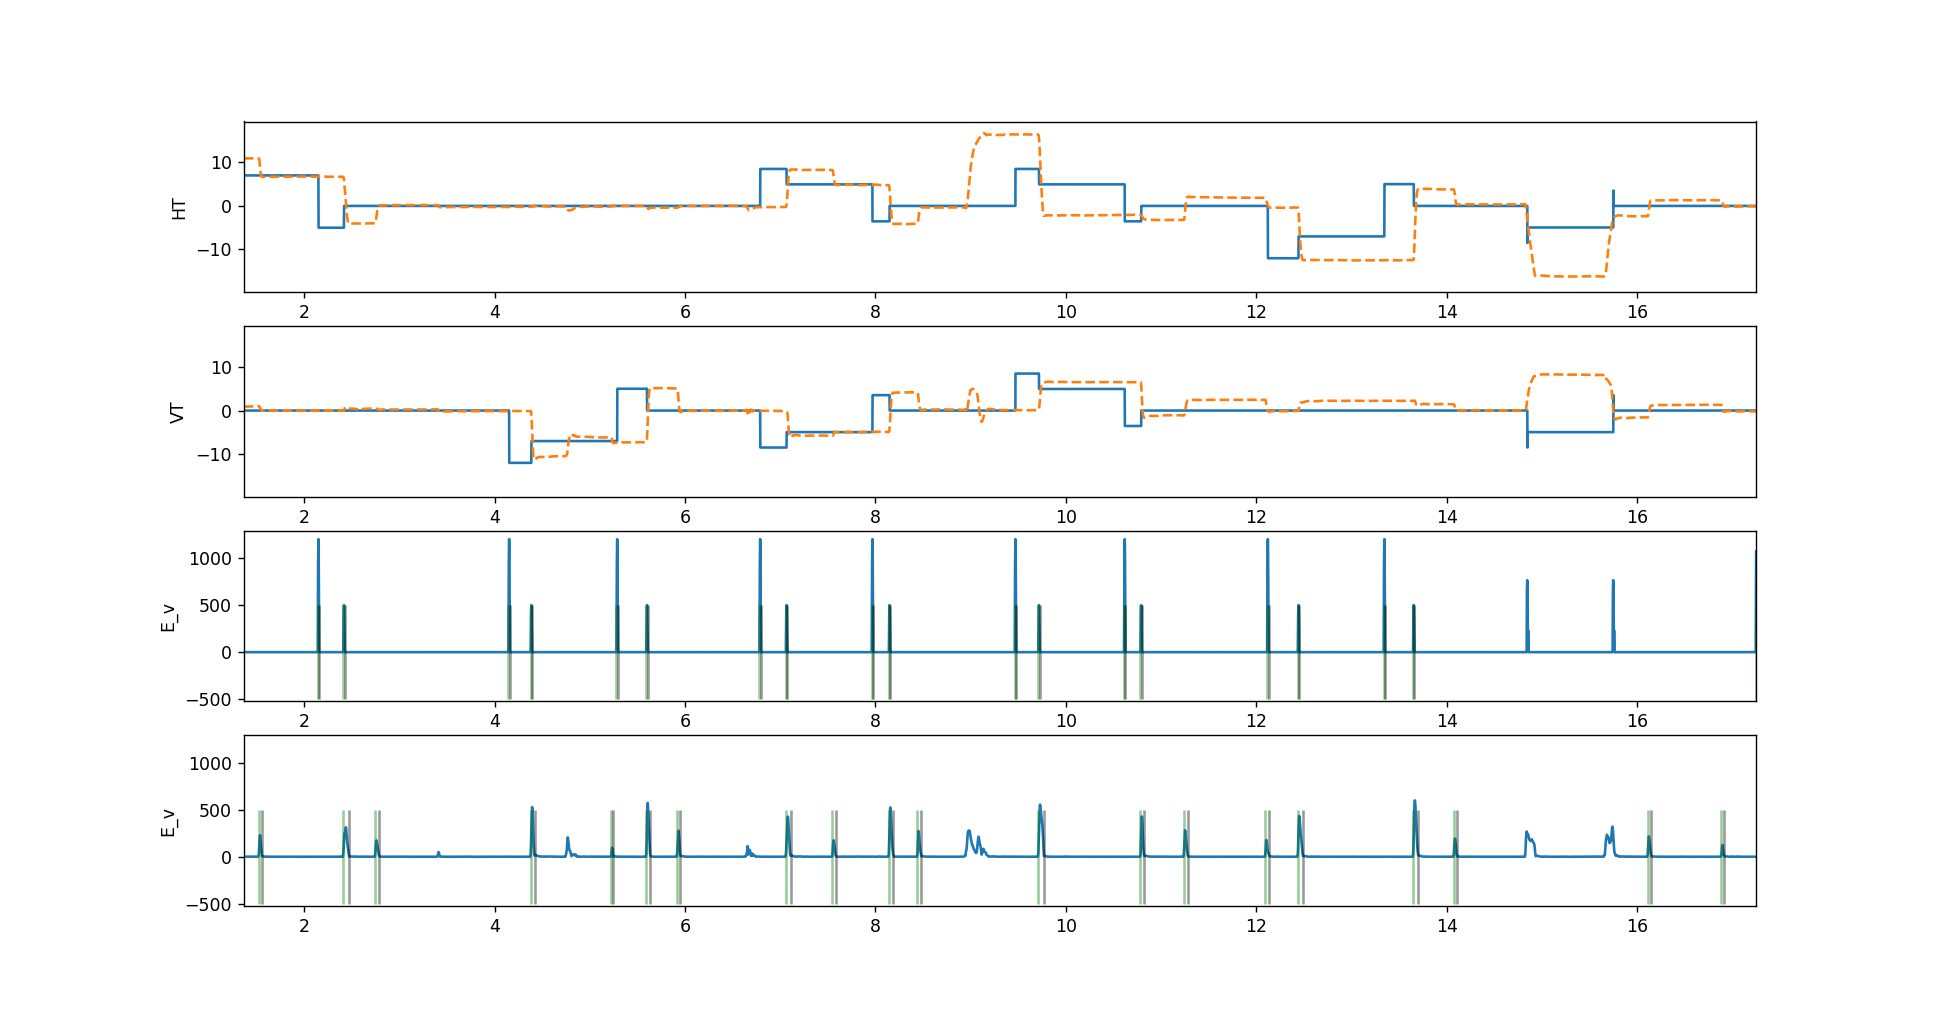

In [14]:
import gc
gc.collect()

ax1 = plt.subplot(411)
plt.plot(t_HT, HT)
plt.plot(t_HT, HE, '--')
plt.ylabel('HT')
plt.subplot(412, sharex=ax1, sharey=ax1)
plt.plot(t_VT, VT)
plt.plot(t_VT, VE, '--')
plt.ylabel('VT')
ax3 = plt.subplot(413, sharex=ax1)
plt.plot(t_VT, mysess.T_v_filtered)
plt.ylabel('E_v')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
plt.plot(t_VE, mysess.E_v_filtered)
plt.ylabel('E_v')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()



<IPython.core.display.Javascript object>


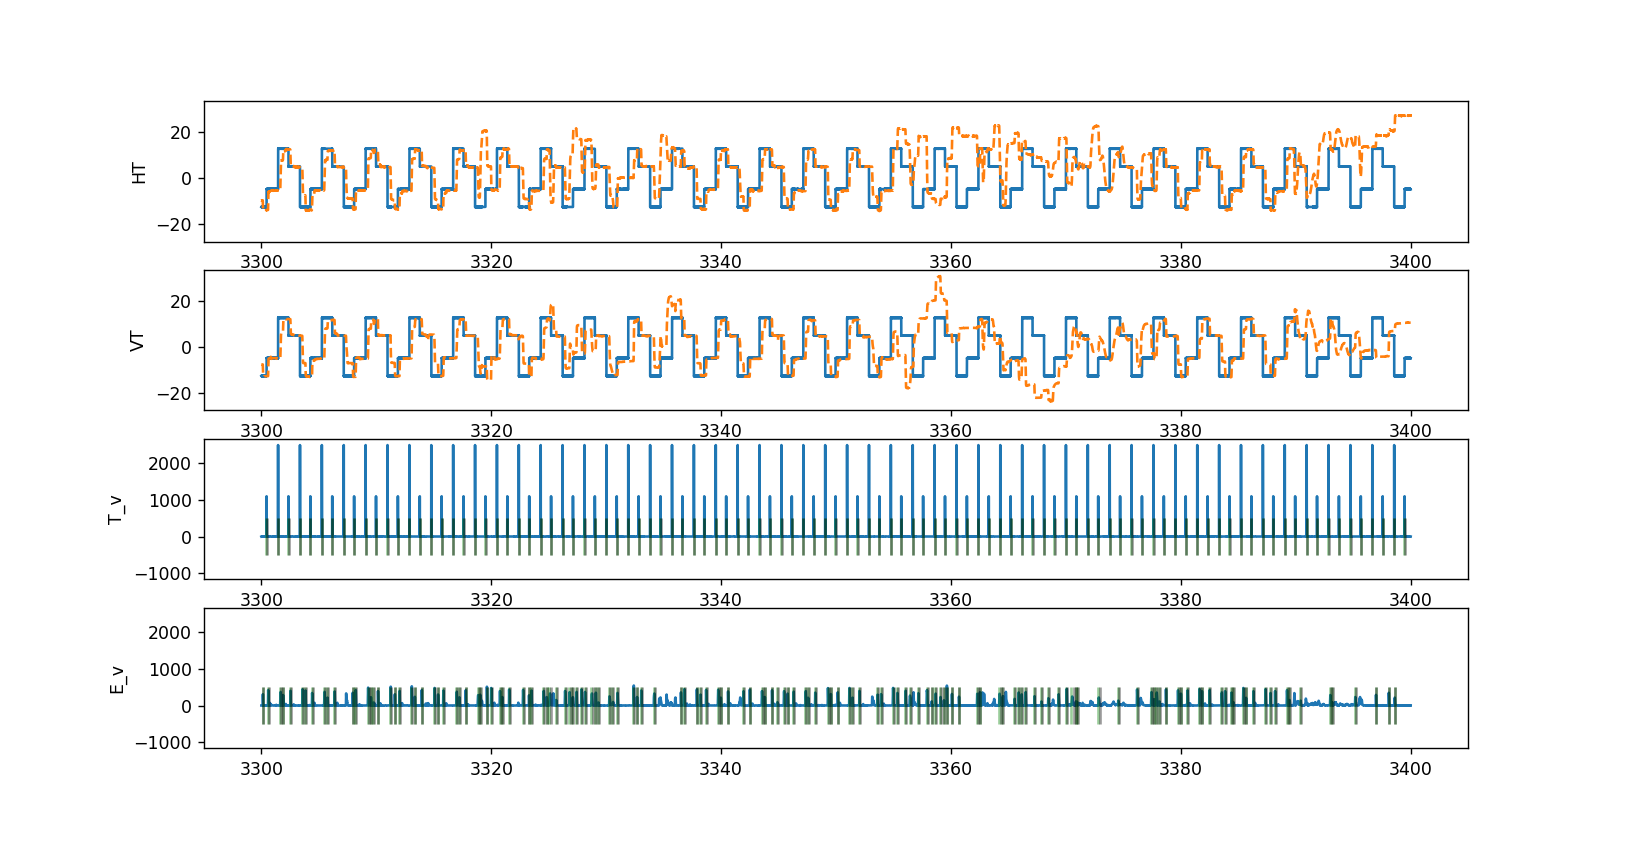

In [127]:
import numpy as np
t_start = 3300 #s
t_end = 3400 #s
plt.figure()


import gc
gc.collect()


ax1 = plt.subplot(411)
t = np.where(np.logical_and((t_HT >= t_start) , (t_HT <= t_end)))
plt.plot(t_HT[t], HT[t])

t = np.where(np.logical_and((t_HE >= t_start) , (t_HE <= t_end)))
plt.plot(t_HE[t], HE[t], '--')
plt.ylabel('HT')

plt.subplot(412, sharex=ax1, sharey=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], VT[t])

t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], VE[t], '--')
plt.ylabel('VT')

ax3 = plt.subplot(413, sharex=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], mysess.T_v_filtered[t])
plt.ylabel('T_v')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_onsets][(t_VT[mysess.target_onsets] >= t_start)&(t_VT[mysess.target_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_offsets][(t_VT[mysess.target_offsets] >= t_start)&(t_VT[mysess.target_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], mysess.E_v_filtered[t])
plt.ylabel('E_v')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_onsets][(t_VE[mysess.saccade_onsets] >= t_start)&(t_VE[mysess.saccade_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_offsets][(t_VE[mysess.saccade_offsets] >= t_start)&(t_VE[mysess.saccade_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()


In [74]:
# find inra-saccadic target jumps. For each saccade, check if that saccade is accompanied by a simultaneous target jump.
# If so, it is an intra-saccadic target_jump. 
# check 25 ms before and after the saccade onset and offset for the target jump onset and offset. if found, the target jump is intra-saccadic
import numpy as np
import quantities as pq
iss_range = pq.quantity.Quantity(0.025, 's')
iss_targets = []
saccades_with_no_iss_target = []
for i, (son, soff) in enumerate(zip(mysess.saccade_onset_times, mysess.saccade_offset_times)):
    iss_targets.append(np.where(np.logical_or(np.logical_and(mysess.target_onset_times < son + iss_range, 
                                                             mysess.target_onset_times > son - iss_range), 
                                              np.logical_and(mysess.target_offset_times < soff + iss_range, 
                                                             mysess.target_offset_times > soff - iss_range)))[0])
    if iss_targets[-1].size == 0:
        saccades_with_no_iss_target.append(i)
        
iss_targets = np.squeeze(np.array([isst for isst in iss_targets if isst.size != 0]))

In [84]:
len(saccades_with_no_iss_target) + len(iss_targets)


5705

In [301]:
# calculate error at the end of each saccade
# check the primary/secondary saccade first?

sons = mysess.saccade_onsets
soffs = mysess.saccade_offsets

tons = mysess.target_onsets
toffs = mysess.target_offsets

In [302]:
son_VE = np.squeeze(mysess.VE[sons])
son_HE = np.squeeze(mysess.HE[sons])
sof_VE = np.squeeze(mysess.VE[soffs])
sof_HE = np.squeeze(mysess.HE[soffs])

son_VT = np.squeeze(mysess.VT[sons])
son_HT = np.squeeze(mysess.HT[sons])
sof_VT = np.squeeze(mysess.VT[soffs])
sof_HT = np.squeeze(mysess.HT[soffs])

In [303]:
# Calculate error direction and magnitude. Error vector is from eye location to the target location
errV = sof_VE - sof_VT
errH = sof_HE - sof_HT

error_mag = np.linalg.norm(np.vstack((errH, errV)), axis = 0)

error_dir = np.arctan2(errV, errH) * 180 / np.pi
# error_dir = 360*(error_dir < 0) + error_dir

In [308]:
# deleting errors with magnitude less than 0.25 degrees

# to_delete = np.where(error_mag < 0.25)[0]
# error_dir = np.delete(error_dir, to_delete)
# soffs = np.delete(soffs, to_delete)
# error_mag = np.delete(error_mag, to_delete)


In [305]:
# error_dir = 360*(error_dir < 0) + error_dir

In [306]:
# bins = np.([-22.5, -135, -90, -45, 0, 45, 90, 135, 180])
bins = np.arange(-180 + 22.5, 180, 45)
print('Bin edges: {}'.format(bins))
bin_ind = np.digitize(error_dir , bins, right=True)
bin_ind[bin_ind == 8] = 0

# Now bins start from 157.5 and increaments counter-clockwise every 45 degrees => 8 bins, 0 to 7



Bin edges: [-157.5 -112.5  -67.5  -22.5   22.5   67.5  112.5  157.5]


<IPython.core.display.Javascript object>


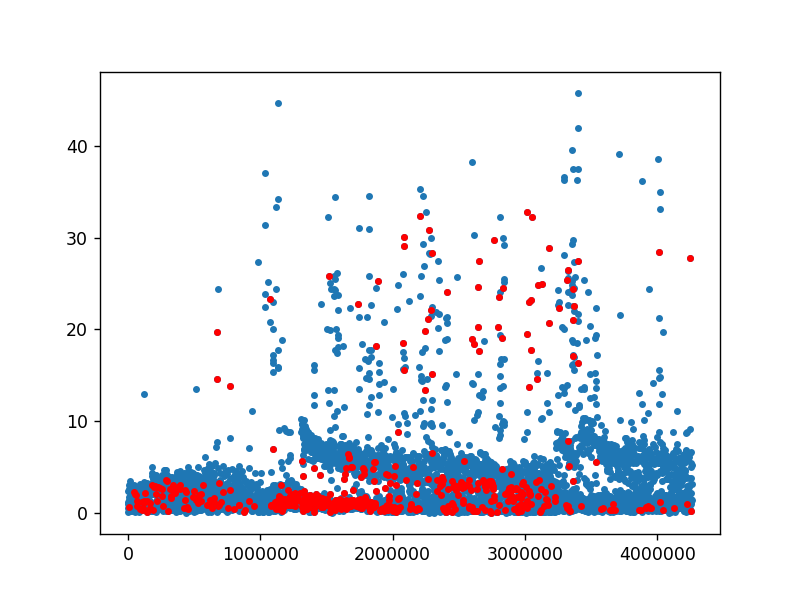

In [307]:
bin_number = 4
plt.figure()
plt.plot(soffs, error_mag, '.')
plt.plot(soffs[bin_ind == bin_number], error_mag[bin_ind == bin_number], '.r')

<IPython.core.display.Javascript object>


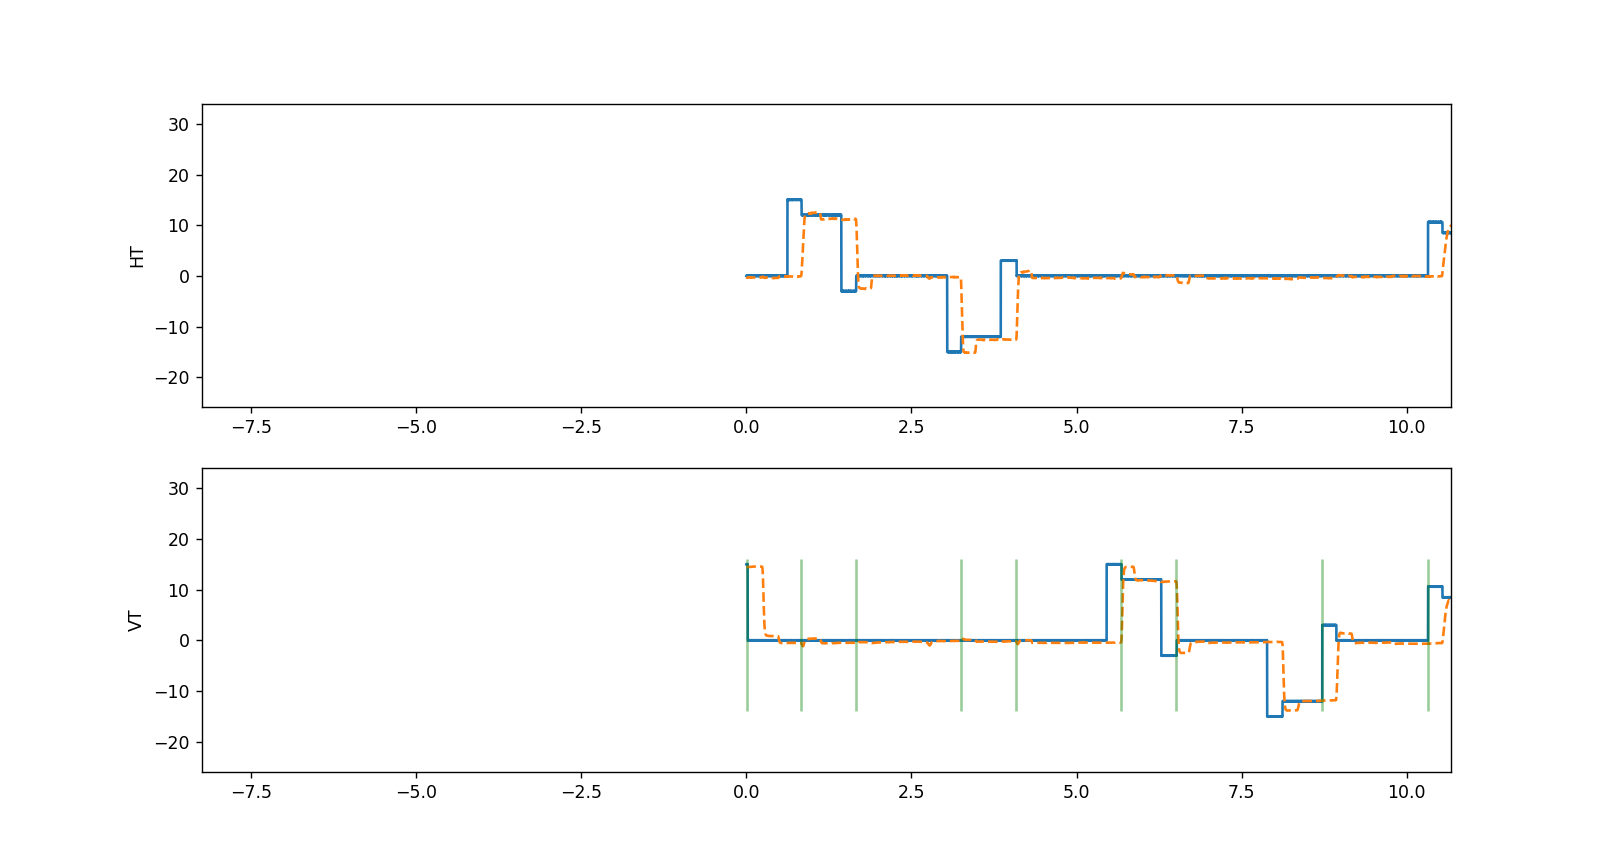

In [105]:
import gc
gc.collect()
plt.figure()
t_start = 0 #s
t_end = 200 #s

ax1 = plt.subplot(211)
t = np.where(np.logical_and((t_HT >= t_start) , (t_HT <= t_end)))
plt.plot(t_HT[t], HT[t])

t = np.where(np.logical_and((t_HE >= t_start) , (t_HE <= t_end)))
plt.plot(t_HE[t], HE[t], '--')
plt.ylabel('HT')

plt.subplot(212, sharex=ax1, sharey=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], VT[t])

t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], VE[t], '--')
# tons = mysess.target_onset_times[iss_targets][(mysess.target_onset_times[iss_targets] <= t_end) & (mysess.target_onset_times[iss_targets] >= t_start)]
# toffs = mysess.target_offset_times[iss_targets][(mysess.target_offset_times[iss_targets] <= t_end) & (mysess.target_offset_times[iss_targets] >= t_start)]
# plt.eventplot(tons, linelengths=30, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(toffs, linelengths=30, colors='r', zorder=10, alpha = 0.4)

tons = mysess.target_onset_times[saccades_with_no_iss_target][(mysess.target_onset_times[saccades_with_no_iss_target] <= t_end) & (mysess.target_onset_times[saccades_with_no_iss_target] >= t_start)]
toffs = mysess.target_offset_times[saccades_with_no_iss_target][(mysess.target_offset_times[saccades_with_no_iss_target] <= t_end) & (mysess.target_offset_times[saccades_with_no_iss_target] >= t_start)]
plt.eventplot(tons, linelengths=30, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(toffs, linelengths=30, colors='b', zorder=10, alpha = 0.4)

plt.ylabel('VT')


# ax3 = plt.subplot(413, sharex=ax1)
# t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
# plt.plot(t_VT[t], mysess.T_v_filtered[t])
# plt.ylabel('T_v')
# # plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_onsets][(t_VT[mysess.target_onsets] >= t_start)&(t_VT[mysess.target_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_offsets][(t_VT[mysess.target_offsets] >= t_start)&(t_VT[mysess.target_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

# ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
# t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
# plt.plot(t_VE[t], mysess.E_v_filtered[t])
# plt.ylabel('E_v')
# # plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_onsets][(t_VE[mysess.saccade_onsets] >= t_start)&(t_VE[mysess.saccade_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_offsets][(t_VE[mysess.saccade_offsets] >= t_start)&(t_VE[mysess.saccade_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()
